In [1]:
from data.custom import CustomTrain, CustomTest
from models.vqgan import VQMultiModel
from data.utils import custom_collate
import torch

model = VQMultiModel.load_from_checkpoint("/home/ubuntu/cifar-testing/ndp/cifar10/model/last.ckpt")
model.to("mps")
model.eval()

dataset = CustomTrain(
            training_images_list_file="/home/ubuntu/cifar-testing/ndp/cifar10/train.txt",
            size=32
        )

img = custom_collate([dataset[1]])

print(img['image'].shape)


/Users/sprucecampbell/Documents/ai/ndp/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/sprucecampbell/Documents/ai/ndp/.venv/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.23). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Working with z of shape (1, 1280, 32, 32) = 1310720 dimensions.
Working with z of shape (1, 1024, 16, 16) = 262144 dimensions.
Working with z of shape (1, 768, 8, 8) = 49152 dimensions.
Working with z of shape (1, 512, 4, 4) = 8192 dimensions.
Working with z of shape (1, 256, 2, 2) = 1024 dimensions.


/Users/sprucecampbell/Documents/ai/ndp/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/sprucecampbell/Documents/ai/ndp/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/sprucecampbell/Documents/ai/ndp/modules/losses/lpips.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling 

loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
['/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_1502.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_811.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_1264.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_1270.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_2779.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_805.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_1516.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_2037.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_1258.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_2989.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_193.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_2751.jpg', '/Users/spruc

In [2]:
x = model.get_input(custom_collate([dataset[0], dataset[1], dataset[2], dataset[3], dataset[4]]), model.image_key)

['/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_1502.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_811.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_1264.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_1270.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_2779.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_805.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_1516.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_2037.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_1258.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_2989.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_193.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_2751.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_187.jpg', '/Users/sprucecampbell/Documents/ai/ndp/imagenet/train/image_2745.j

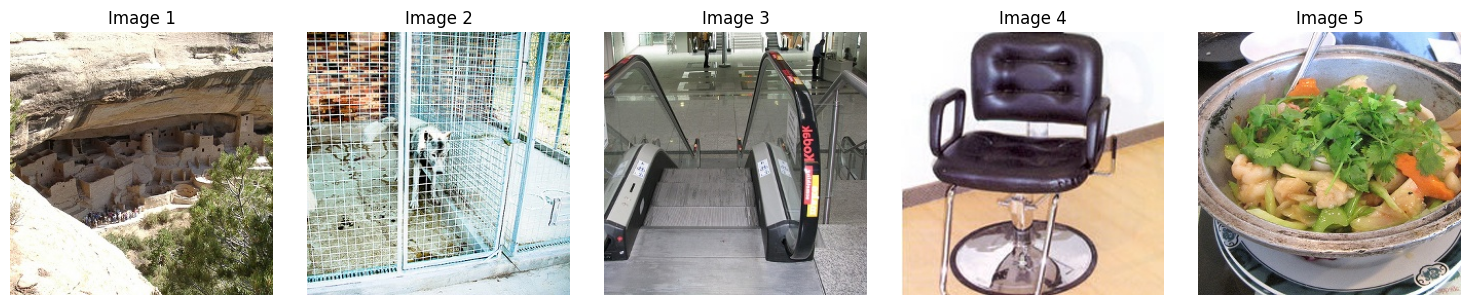

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    # Convert tensor to image format and move to CPU 
    img = x[i].permute(1,2,0).cpu().numpy()
    # Clip values to valid range
    img = (img * 0.5 + 0.5).clip(0, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Image {i+1}')

plt.tight_layout()
plt.show()

In [4]:
import numpy as np
with torch.no_grad():
    _, _, _, _, _, diff, info = model.encode(x.to("mps"))
    (_, _, info1), (_, _, info2), (_, _, info3), (_, _, info4), (_, _, info5) = info
    
    quant1 = model.quantize_1.get_codebook_entry(info1, (5, 32, 32, 8))
    quant2 = model.quantize_2.get_codebook_entry(info2, (5, 16, 16, 8))
    quant3 = model.quantize_3.get_codebook_entry(info3, (5, 8, 8, 8))
    quant4 = model.quantize_4.get_codebook_entry(info4, (5, 4, 4, 8))
    quant5 = model.quantize_5.get_codebook_entry(info5, (5, 2, 2, 8))
    
    zero1 = model.quantize_1.get_codebook_entry(torch.zeros_like(info1), (5, 32, 32, 8))
    zero2 = model.quantize_2.get_codebook_entry(torch.zeros_like(info2), (5, 16, 16, 8))
    zero3 = model.quantize_3.get_codebook_entry(torch.zeros_like(info3), (5, 8, 8, 8))
    zero4 = model.quantize_4.get_codebook_entry(torch.zeros_like(info4), (5, 4, 4, 8))
    zero5 = model.quantize_5.get_codebook_entry(torch.zeros_like(info5), (5, 2, 2, 8))
    
    # Generate reconstructions with progressively more tokens
    y1 = model.decode(zero1, zero2, zero3, zero4, quant5)
    y2 = model.decode(zero1, zero2, zero3, quant4, quant5)
    y3 = model.decode(zero1, zero2, quant3, quant4, quant5)
    y4 = model.decode(zero1, quant2, quant3, quant4, quant5)
    y5 = model.decode(quant1, zero2, zero3, zero4, quant5)

# Set up subplot grid
plt.figure(figsize=(15,15))
images = [y1, y2, y3, y4, y5]

for i, img in enumerate(images):
    for j in range(5):  # For each image in batch
        plt.subplot(5, 5, i*5 + j + 1)
        # Convert tensor to image format and move to CPU
        img_j = img[j].permute(1,2,0).cpu().numpy()
        # Clip values to valid range
        img_j = (img_j * 0.5 + 0.5).clip(0, 1)
        plt.imshow(img_j)
        plt.axis('off')
        if j == 0:  # Only show level labels for first column
            plt.title(f'{i+1} levels')

plt.tight_layout()
plt.show()

# Calculate average reconstruction loss (MSE) for each level
x_np = x.permute(0,2,3,1).cpu().numpy()
x_np = (x_np * 0.5 + 0.5).clip(0, 1)

avg_losses = []
for img in images:
    img_np = img.permute(0,2,3,1).cpu().numpy()
    img_np = (img_np * 0.5 + 0.5).clip(0, 1)
    mse = np.mean((x_np - img_np) ** 2)
    avg_losses.append(mse)

# Plot average losses
plt.figure(figsize=(8,4))
plt.plot(range(1,6), avg_losses, marker='o')
plt.xlabel('Number of Levels')
plt.ylabel('Average MSE Loss')
plt.title('Average Reconstruction Loss by Number of Levels')
plt.grid(True)
plt.show()


AssertionError: Torch not compiled with CUDA enabled